# Latent Factor Models for Collaborative Filtering

Load Pandas, we are going to need it for manipulating data

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
np.set_printoptions(precision = 3)

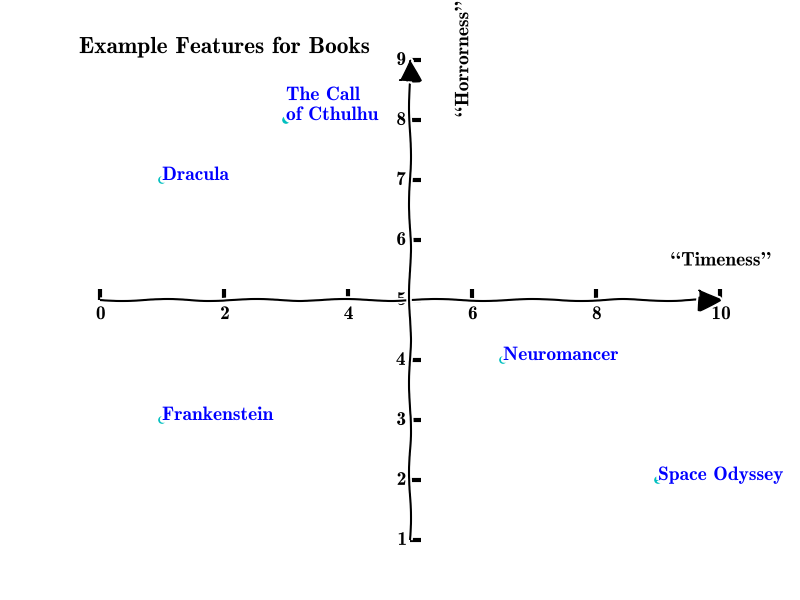

In [2]:
Image(filename='books.png')

Now load the data

In [3]:
data = pd.read_csv("user_ratings.csv")
d = data.to_latex()
text_file = open("Output.txt", "w")
text_file.write(d)
text_file.close()


In [4]:
n_features = 2

user_ratings = data.values
user_preferences = np.random.random((user_ratings.shape[0], n_features))
item_features = np.random.random((user_ratings.shape[1],n_features))

In [5]:
item_features

array([[ 0.669,  0.99 ],
       [ 0.631,  0.823],
       [ 0.88 ,  0.65 ],
       [ 0.456,  0.455],
       [ 0.271,  0.23 ]])

In [6]:
user_preferences

array([[ 0.215,  0.764],
       [ 0.011,  0.788],
       [ 0.889,  0.808],
       [ 0.283,  0.211],
       [ 0.131,  0.694],
       [ 0.244,  0.158],
       [ 0.632,  0.715],
       [ 0.203,  0.621],
       [ 0.944,  0.554],
       [ 0.096,  0.883]])

In [7]:
def predict_rating(user_id,item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = user_preferences[user_id]
    item_preference = item_features[item_id]
    return user_preference.dot(item_preference)

def train(user_id, item_id, rating,alpha = 0.0001):
    
    #print item_id
    prediction_rating = predict_rating(user_id, item_id)
    err = alpha * ( prediction_rating- rating );
    #print err
    user_pref_values = user_preferences[user_id][:]
    user_preferences[user_id] -= err * item_features[item_id]
    item_features[item_id] -= err * user_pref_values
    return err
    


def sgd(iterations = 30000):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    for iteration in range(0,iterations):
        error = []
        for user_id in range(0,user_preferences.shape[0]):
            for item_id in range(0,item_features.shape[0]):
                rating = user_ratings[user_id][item_id]
                if(not np.isnan(rating)):
                    err = train(user_id,item_id,rating)
                    error.append(err)
    mse = (np.array(error) ** 2).mean()          
    print mse
                    
                    
    


In [8]:
#train(0,0,10)
sgd()
#user_preferences 
#item_features

1.37221830937e-08


In [9]:
predictions = user_preferences.dot(item_features.T)
predictions

array([[ 6.25 ,  2.589,  8.212,  6.176,  4.423],
       [ 5.49 ,  1.554,  3.48 ,  5.071,  6.506],
       [ 7.411,  2.75 ,  8.079,  7.166,  6.409],
       [ 8.524,  2.718,  6.985,  8.023,  8.992],
       [ 6.05 ,  2.197,  6.349,  5.826,  5.405],
       [ 2.22 ,  1.389,  5.35 ,  2.424, -0.136],
       [ 3.749,  0.447, -0.81 ,  3.161,  6.679],
       [ 6.838,  1.549,  2.327,  6.126,  9.513],
       [ 5.208,  2.457,  8.397,  5.293,  2.594],
       [ 3.761,  1.526,  4.775,  3.7  ,  2.778]])

In [10]:
values = [zip(user_ratings[i], predictions[i]) for i in range(0,predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns
comparison_data.applymap(lambda (x,y): "(%2.3f|%2.3f)"%(x,y))

,The Call of Cthulhu,Frankenstein,Dracula,Neuromancer,Space Odyssey
0,(8.000|6.250),(2.000|2.589),(nan|8.212),(5.000|6.176),(4.000|4.423)
1,(3.000|5.490),(2.000|1.554),(nan|3.480),(7.000|5.071),(7.000|6.506)
2,(9.000|7.411),(nan|2.750),(7.000|8.079),(8.000|7.166),(5.000|6.409)
3,(nan|8.524),(nan|2.718),(7.000|6.985),(8.000|8.023),(9.000|8.992)
4,(nan|6.050),(1.000|2.197),(8.000|6.349),(3.000|5.826),(7.000|5.405)
5,(2.000|2.220),(3.000|1.389),(5.000|5.350),(nan|2.424),(nan|-0.136)
6,(4.000|3.749),(2.000|0.447),(nan|-0.810),(2.000|3.161),(7.000|6.679)
7,(7.000|6.838),(1.000|1.549),(2.000|2.327),(7.000|6.126),(9.000|9.513)
8,(3.000|5.208),(3.000|2.457),(nan|8.397),(7.000|5.293),(3.000|2.594)
9,(4.000|3.761),(nan|1.526),(5.000|4.775),(3.000|3.700),(3.000|2.778)


In [11]:
comparison_data

,The Call of Cthulhu,Frankenstein,Dracula,Neuromancer,Space Odyssey
0,"(8.0, 6.24994878349)","(2.0, 2.5888236607)","(nan, 8.21193085297)","(5.0, 6.17567190219)","(4.0, 4.42317999281)"
1,"(3.0, 5.48976766936)","(2.0, 1.55424906865)","(nan, 3.47951864016)","(7.0, 5.07050060477)","(7.0, 6.50579635822)"
2,"(9.0, 7.4110229162)","(nan, 2.75012307774)","(7.0, 8.07930545168)","(8.0, 7.16571619056)","(5.0, 6.40876688228)"
3,"(nan, 8.5244143676)","(nan, 2.71835903258)","(7.0, 6.98492842886)","(8.0, 8.02339057892)","(9.0, 8.99168592378)"
4,"(nan, 6.04981661032)","(1.0, 2.19747955438)","(8.0, 6.34883419815)","(3.0, 5.82619086262)","(7.0, 5.40467989578)"
5,"(2.0, 2.22000819792)","(3.0, 1.3885041994)","(5.0, 5.3496669946)","(nan, 2.42430175769)","(nan, -0.136416282566)"
6,"(4.0, 3.74896365293)","(2.0, 0.447210624678)","(nan, -0.810074882792)","(2.0, 3.16052264723)","(7.0, 6.6792285774)"
7,"(7.0, 6.838226725)","(1.0, 1.5491038278)","(2.0, 2.3269702476)","(7.0, 6.12564656084)","(9.0, 9.5126951797)"
8,"(3.0, 5.20761967931)","(3.0, 2.45682942182)","(nan, 8.39744120432)","(7.0, 5.29318189042)","(3.0, 2.59402211109)"
9,"(4.0, 3.76061966559)","(nan, 1.52567692796)","(5.0, 4.77499509361)","(3.0, 3.7001717178)","(3.0, 2.77807103432)"


In [26]:
d = comparison_data.to_latex()
text_file = open("comparison.txt", "w")
text_file.write(d)
text_file.close()